# 階層的クラスタリング

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print("データセット内容の種類")
print(iris.keys())
print("特徴量の種類")
print(iris['feature_names'])
print("ラベルの種類")
print(iris.target_names)
#print("shape")
#print(iris['data'].shape)
#print("特徴量の確認")
#print(iris['data'][:5])

データセット内容の種類
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
ラベルの種類
['setosa' 'versicolor' 'virginica']


In [3]:
#目的に合うようにデータを加工する
X = iris.data[:, 2:4] #'petal length (cm)', 'petal width (cm)'のみを使用する
print("Xのサイズ")
print(X.shape)
print("X")
print(X[:5, :])

y = iris.target
print("yのサイズ")
print(y.shape)
print("y")
print(y[:5])

target_names = iris.target_names


Xのサイズ
(150, 2)
X
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
yのサイズ
(150,)
y
[0 0 0 0 0]


Text(0, 0.5, 'petal width (cm)')

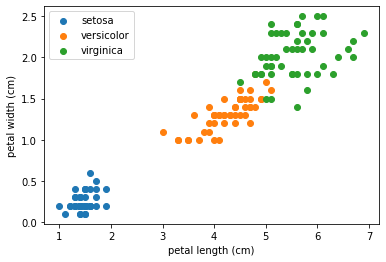

In [4]:
plt.figure()
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [7]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3

model = AgglomerativeClustering(linkage="ward", n_clusters=n_clusters)
model.fit(X)

AgglomerativeClustering(n_clusters=3)

Text(0, 0.5, 'petal width (cm)')

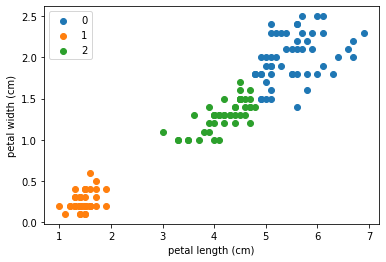

In [9]:
y_hat = model.labels_

plt.figure()
for i, target_name in enumerate(target_names):
    plt.scatter(X[y_hat == i, 0], X[y_hat == i, 1], label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

階層的クラスタリングは処理内容を樹形図で表示することが可能なため、  
内部構造を確認、説明しやすい。

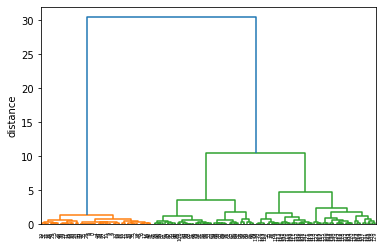

In [13]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X, method='ward')
hierarchy.dendrogram(Z)
plt.ylabel("distance")
plt.show()

In [15]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.05, random_state=0)

No handles with labels found to put in legend.


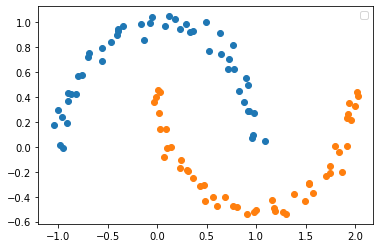

In [16]:
plt.figure()
for i in range(2):
    plt.scatter(X[y == i, 0], X[y == i, 1])
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [20]:
n_clusters = 2

model = AgglomerativeClustering(linkage="ward", n_clusters=n_clusters)
model.fit(X)

AgglomerativeClustering()

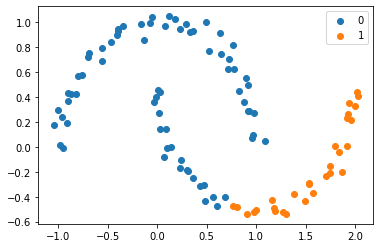

In [21]:
y_hat = model.labels_

plt.figure()
for i in range(n_clusters):
    plt.scatter(X[y_hat == i, 0], X[y_hat == i, 1], label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)